In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Ingestion
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
## Data Handling, checking for null and duplicated values
titanic.isnull().sum() # Looks like we have null values for age, embarked, deck and embark_town columns

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
titanic.duplicated().sum() #  Lots of duplicated data in the dataset as well

107

In [9]:
titanic.drop_duplicates(inplace = True)
titanic.duplicated().sum() # Dropped all the duplicated values

0

In [14]:
average_age = titanic[['who','age']].groupby(titanic['who']).mean()
average_age # Average age of each passenger based on being a child, man or woman

,age
who,
child,6.438049
man,33.713351
woman,31.985981


In [42]:
titanic['age'] = titanic['age'].groupby(titanic['who']).apply(lambda x: x.fillna(x.mean()))
titanic['age'].isnull().sum() # Filled all the null values for ages with averages

0

In [47]:
# Delete the null values for embarked and embark_town since imputing would not fit well with categorical data
titanic = titanic[titanic['embarked'].isnull() == False]
titanic = titanic[titanic['embark_town'].isnull() == False]

# Delete the whole column for deck since there are so many missing values
titanic.drop(columns = 'deck', inplace = True)
titanic.isnull().sum() # Now there are no missing values

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

<IPython.core.display.Javascript object>


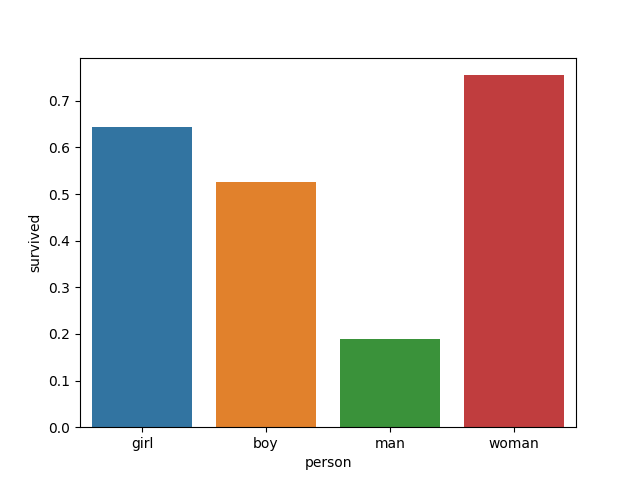

/home/phil/projects/my_project_env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [115]:
## Looking at sex how are they related to the survival rate
sex_who_survival_relation = pd.crosstab(titanic.survived, [titanic.who, titanic.sex], normalize='columns')
sex_who_survival_relation = sex_who_survival_relation.transpose()
sex_who_survival_relation.reset_index(inplace = True)
sex_who_survival_relation.rename(columns = {1: 'survived', 0: 'died'}, inplace = True)
sex_who_survival_relation['person']= ['girl', 'boy', 'man', 'woman']
fig1 = plt.figure()
sex_survival_plot = sns.barplot(sex_who_survival_relation['person'], sex_who_survival_relation['survived'])
# Woman and girls had the highest survival rates

/home/phil/projects/my_project_env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


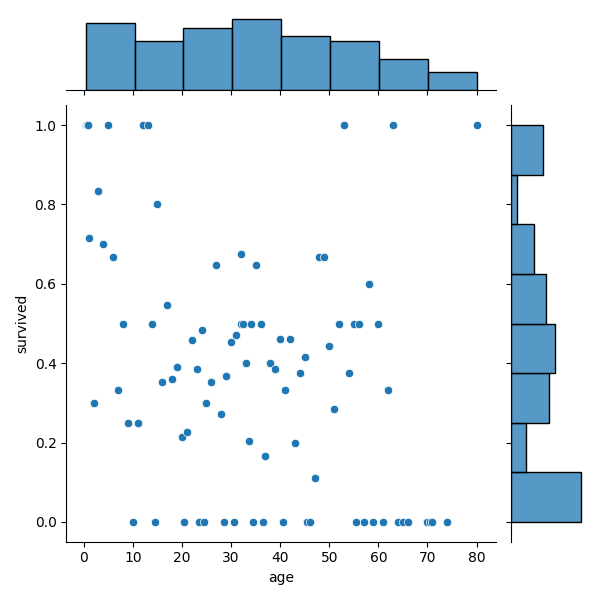

In [88]:
## Relation between age and survival rate
age_survival = pd.DataFrame(titanic['survived'].groupby(titanic['age']).mean())
age_survival.reset_index(inplace = True)
age_survival_plot = sns.jointplot(age_survival['age'], age_survival['survived'])
# There seems to be no correlation between age and survival rates

<IPython.core.display.Javascript object>


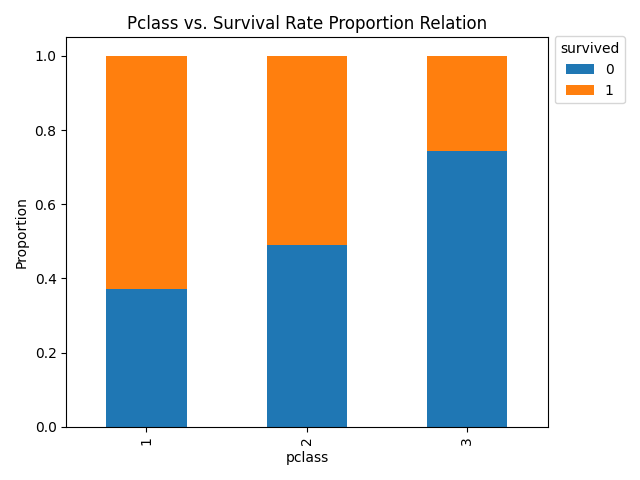

<IPython.core.display.Javascript object>


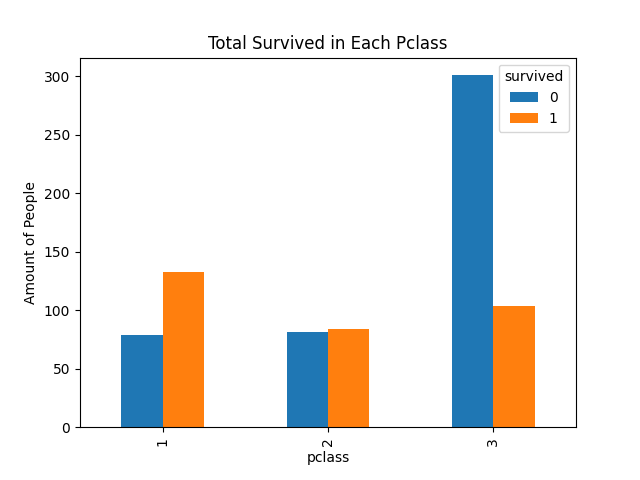

Text(0.5, 1.0, 'Total Survived in Each Pclass')

In [111]:
## Relation between pclass and survival rate
pclass_survived = pd.crosstab(titanic.survived, titanic.pclass, normalize='columns')
pclass_survived_total = pd.crosstab(titanic.survived, titanic.pclass)
pclass_survived_plot = pclass_survived.transpose().plot(kind = 'bar', stacked= True)
plt.title('Pclass vs. Survival Rate Proportion Relation')
plt.ylabel('Proportion')
plt.legend(title='survived', bbox_to_anchor=(1, 1.02),
         loc='upper left')
plt.tight_layout()
pclass_total_survived_plot = pclass_survived_total.transpose().plot(kind = 'bar')
plt.ylabel('Amount of People')
plt.title('Total Survived in Each Pclass')

<IPython.core.display.Javascript object>


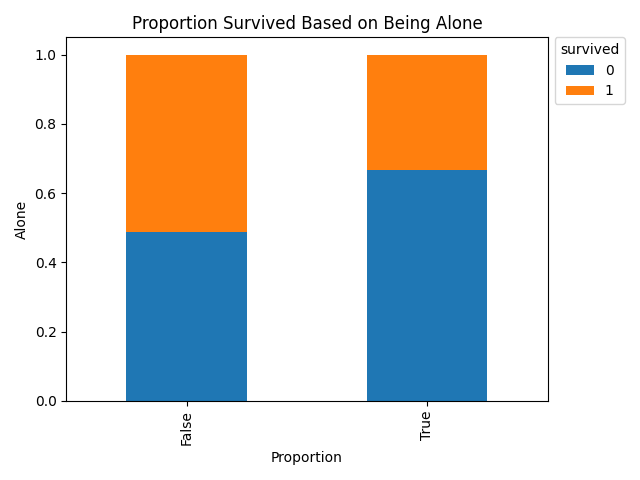

In [122]:
## Alone vs. Survival Rate
alone_survived = pd.crosstab(titanic.survived, titanic.alone, normalize='columns')
alone_survived
alone_survived_plot = alone_survived.transpose().plot(kind = "bar", stacked = True)
plt.ylabel('Proportion')
plt.xlabel('Alone')
plt.legend(title='survived', bbox_to_anchor=(1, 1.02),
         loc='upper left')
plt.title('Proportion Survived Based on Being Alone')
plt.tight_layout()

/home/phil/projects/my_project_env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


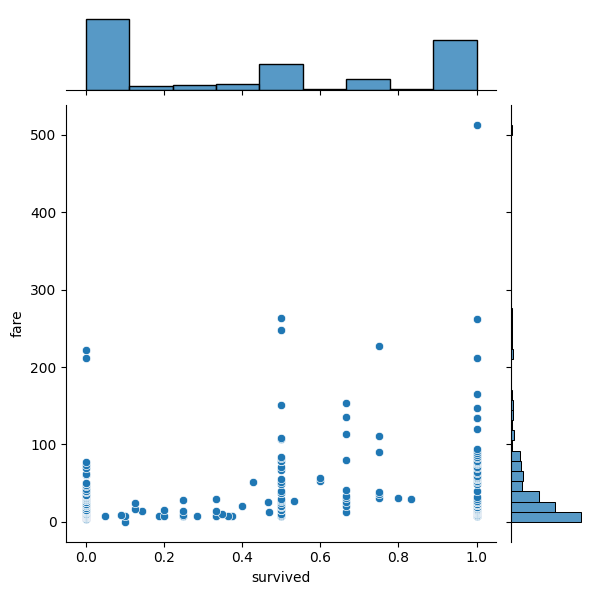

0.24479761567010203

In [133]:
## Find if there is any relation between cost of fare and survival
fare_vs_survival = pd.DataFrame(titanic['survived'].groupby(titanic['fare']).mean())
fare_vs_survival.reset_index(inplace=True)
fare_vs_survival_plot = sns.jointplot(fare_vs_survival['survived'], fare_vs_survival['fare'])
titanic['fare'].corr(titanic['survived'])
#There is a week correlation between fare and survival rate

In [139]:
## Relationship between fare, sex and survival rate
fare_sex_survival = titanic.pivot_table(index='survived', columns='who', values='fare', aggfunc=np.mean)
fare_sex_survival
#More paid for the fare for men and women led to higher survival rates. For children this was not the case

who,child,man,woman
survived,,,
0,32.633703,23.888340,19.438526
1,33.175350,42.052796,57.705696


<IPython.core.display.Javascript object>


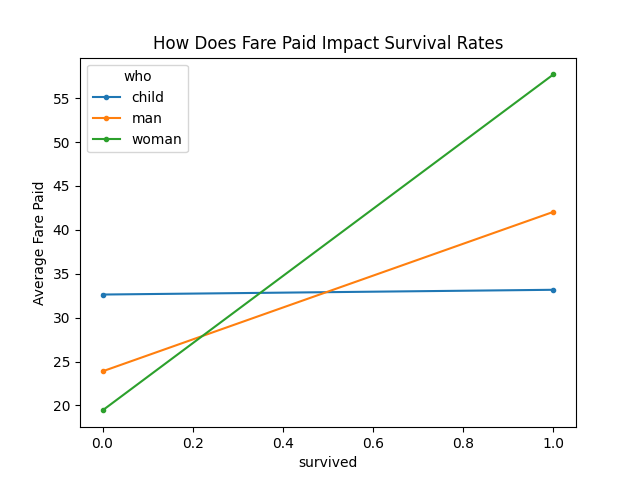

Text(0, 0.5, 'Average Fare Paid')

In [137]:
fare_sex_survival.plot(kind='line', marker='.')
plt.title('How Does Fare Paid Impact Survival Rates')
plt.ylabel('Average Fare Paid')

In [140]:
## Relationship between age pclass and survival
age_pclass_survival = titanic.pivot_table(index='survived', columns='pclass', values='age', aggfunc=np.mean)
age_pclass_survival

pclass,1,2,3
survived,,,
0,41.800003,34.301564,27.750628
1,34.942561,25.883675,23.134300


<IPython.core.display.Javascript object>


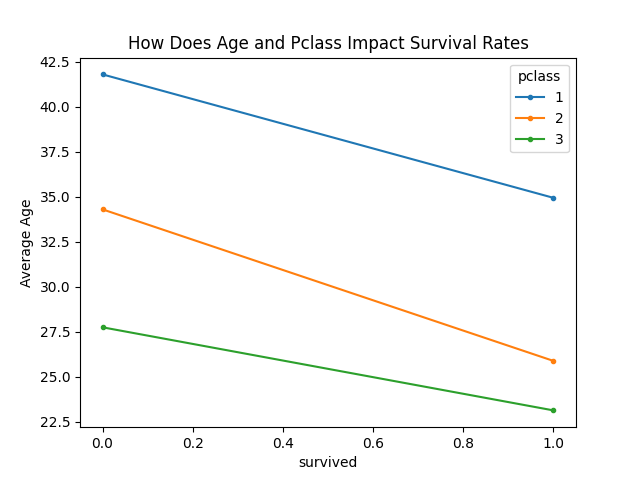

Text(0, 0.5, 'Average Age')

In [142]:
age_pclass_survival.plot(kind='line', marker='.')
plt.title('How Does Age and Pclass Impact Survival Rates')
plt.ylabel('Average Age')
# The younger that you are, regardless of pclass, you have a larger chance of survival

In [144]:
## Relationship between town embarked and survival rates
town_survived = pd.crosstab(titanic.survived, titanic.embark_town)
town_survived

embark_town,Cherbourg,Queenstown,Southampton
survived,,,
0,65,39,357
1,90,20,211


<IPython.core.display.Javascript object>


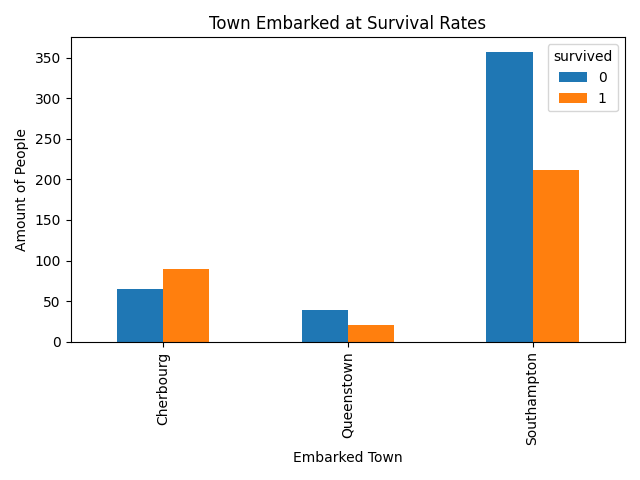

In [149]:
town_survived.transpose().plot(kind='bar')
plt.xlabel("Embarked Town")
plt.ylabel('Amount of People')
plt.title('Town Embarked at Survival Rates')
plt.tight_layout()
# Cherbourg is the only town that had a higher rate of people surviving

In [150]:
# Let's see if Cherbourg had a larger average fare paid or better pclass
town_age_pclass = titanic[['age', 'pclass']].groupby(titanic['embark_town']).mean()
town_age_pclass
## Cherbourg has a significant lower pclass which could contribut to the survival rate. No noticeable differences in age.

,age,pclass
embark_town,,
Cherbourg,31.423884,1.819355
Queenstown,30.634419,2.881356
Southampton,29.899630,2.297535


In [167]:
town_fare= titanic['fare'].groupby(titanic['embark_town']).mean()
town_fare = pd.DataFrame(town_fare)
town_fare
## Cherbourg passengers also paid significantly more for their fare on average

,fare
embark_town,
Cherbourg,63.710056
Queenstown,14.563490
Southampton,28.731865


<IPython.core.display.Javascript object>


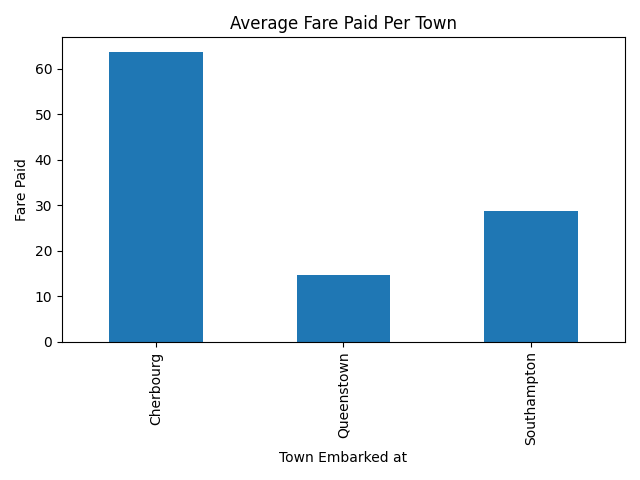

In [169]:
town_fare_plot = town_fare.plot(kind='bar')
plt.xlabel('Town Embarked at')
plt.ylabel('Fare Paid')
plt.title('Average Fare Paid Per Town')
town_fare_plot.get_legend().remove()
plt.tight_layout()

In [171]:
## Relationship between being alone, your age and surviving
alone_age_survival = titanic.pivot_table(index='survived', columns='alone', values='age', aggfunc=np.mean)
alone_age_survival
#There does not seem to be too much of a meaningful difference. Let's check the standard deviation of age to be sure.

alone,False,True
survived,,
0,27.862558,33.230554
1,26.229274,31.688459


In [173]:
titanic['age'].std()
#Standard deviation is much higher than the differences we saw in the table

188.7840679041429

<IPython.core.display.Javascript object>


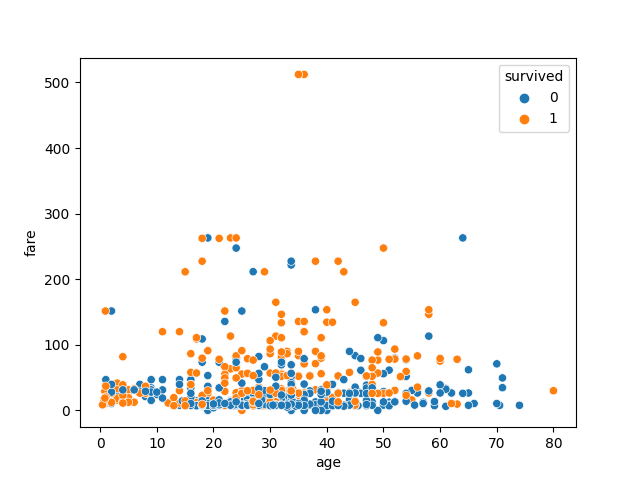

/home/phil/projects/my_project_env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='fare'>

In [176]:
## Does age, fare and survival rates have any meaningful relationship
age_fare_survival = titanic[['age', 'fare', 'survived']]
plt.figure()
sns.scatterplot(age_fare_survival['age'], age_fare_survival['fare'], hue=age_fare_survival['survived'])
## As shown in the plot there does not seem to be any meaningful relationship betweem these variables

In [178]:
## Let's see if sex and being alone had any bearing on the survival rate
sex_alone_survived = titanic.pivot_table(index='alone', columns='sex', values='survived', aggfunc=np.mean)
sex_alone_survived

sex,female,male
alone,,
False,0.720670,0.276730
True,0.767857,0.186747


<IPython.core.display.Javascript object>


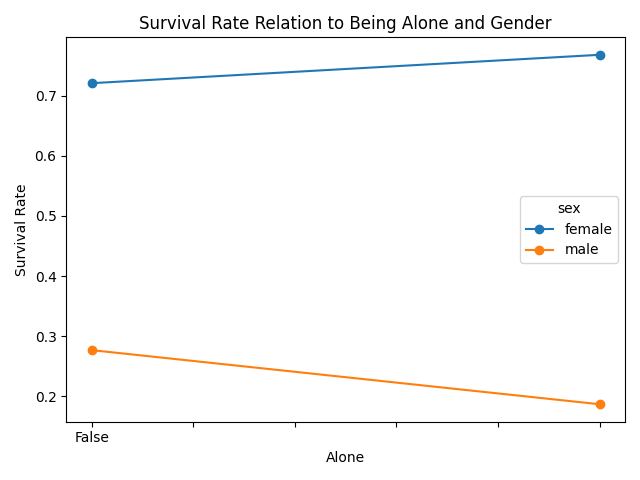

In [180]:
sex_alone_survived.plot(kind='line', marker='o')
plt.title('Survival Rate Relation to Being Alone and Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Alone')
plt.tight_layout()
#Not too big of a relationship but we see a reduced survival rate for men when traveling alone while an increased 
#survival rate for woman when they traveled alone

In [181]:
## Relationship between pclass sex and survival rate
sex_pclass_survived = titanic.pivot_table(index='survived', columns='sex', values='pclass')
sex_pclass_survived

sex,female,male
survived,,
0,2.842105,2.410390
1,1.869767,1.990566


<IPython.core.display.Javascript object>


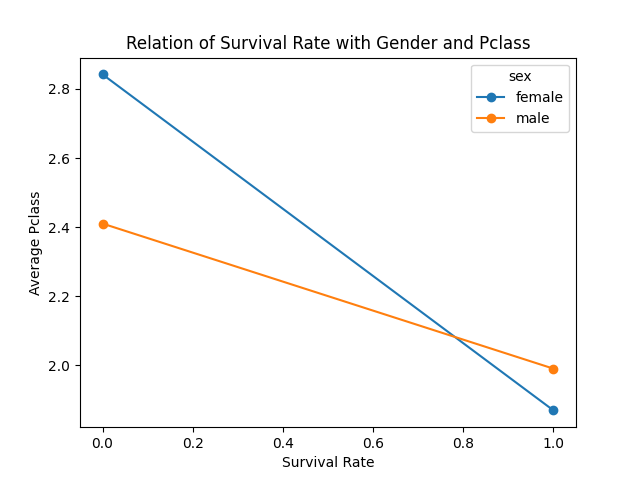

Text(0.5, 0, 'Survival Rate')

In [184]:
sex_pclass_survived.plot(kind='line', marker ='o')
plt.title('Relation of Survival Rate with Gender and Pclass')
plt.ylabel('Average Pclass')
plt.xlabel('Survival Rate')
#As expected the survival rate increases as you get a better pclass (the lower the number the better). This trend
#is especially pronounced for female rather than males though